## EDA - Exploratory Data Analysis  
### Online Retail Dataset  
**Dataset Source:** [Kaggle - Online Retail Dataset](https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset)

A transaction-level dataset from a UK online retail store containing purchases made from December 2009 to December 2011. It includes product codes, descriptions, quantities, prices, timestamps, customer identifiers, and countries, supporting analysis of sales patterns, customer behavior, product performance, returns, and time-based trends.

---

### Key Columns

- **InvoiceNo** - Invoice number. Nominal. A 6-digit code uniquely assigned to each transaction; codes starting with "C" indicate cancellations.
- **StockCode** - Product code. Nominal. A 5-digit identifier uniquely assigned to each product.
- **Description** - Product name. Nominal. Text description of the purchased item.
- **Quantity** - Units purchased. Numeric (integer). Number of items per transaction; negative values represent returns.
- **InvoiceDate** - Transaction date. Datetime. Stored as YYYY-MM-DD HH:MM.
- **UnitPrice** - Price per unit in GBP. Numeric (float). Product price per single item.
- **CustomerID** - Customer identifier. Nominal. A 5-digit number uniquely assigned to each customer.
- **Country** - Customer's country. Nominal. Name of the country where each customer resides.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load dataset from the .ipynb_checkpoints folder
df = pd.read_csv(r"C:\Users\Luvje\.ipynb_checkpoints\online_retail.csv", encoding="ISO-8859-1")

# Show first rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# viewing the data types of columns
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('Int64')   # nullable integer
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)

In [10]:
# viewing the data types of columns
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
dtype: object

In [11]:
print(df.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [12]:
df = df.dropna(subset=['CustomerID'])

In [13]:
print(df.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [14]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

517       True
527       True
537       True
539       True
555       True
          ... 
541675    True
541689    True
541692    True
541699    True
541701    True
Length: 5225, dtype: bool

In [15]:
df.duplicated().sum()

np.int64(5225)

In [17]:
#show duplicated rows
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


In [18]:
#remove duplicates
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (401604, 8) 

number of rows:  401604
number of columns:  8


In [21]:
# Statistical summary
df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401604,401604,401604,401604.000000,401604,401604.000000,401604.0,401604
unique,22190,3684,3896,NaN,NaN,NaN,<NA>,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,<NA>,United Kingdom
freq,542,2065,2058,NaN,NaN,NaN,<NA>,356728
mean,NaN,NaN,NaN,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,12346.0,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:02:00,1.250000,13939.0,NaN
50%,NaN,NaN,NaN,5.000000,2011-07-29 15:40:00,1.950000,15145.0,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 11:58:30,3.750000,16784.0,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.0,NaN


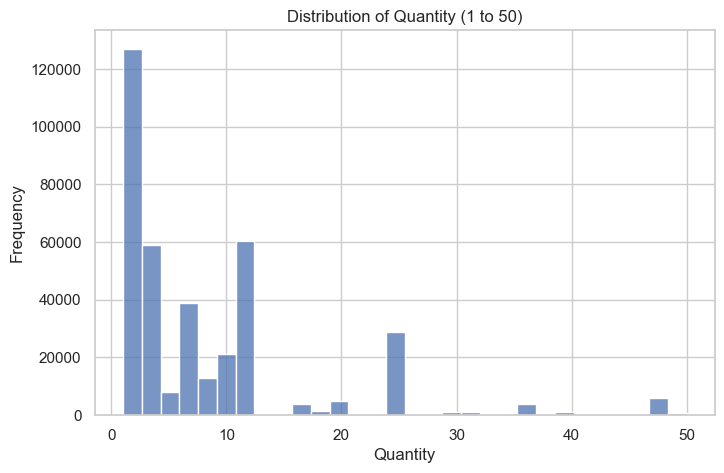

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Quantity'].between(1, 50)]['Quantity'], bins=30)
plt.title("Distribution of Quantity (1 to 50)")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

In [26]:
df['Amount'] = df['Quantity'] * df['UnitPrice']

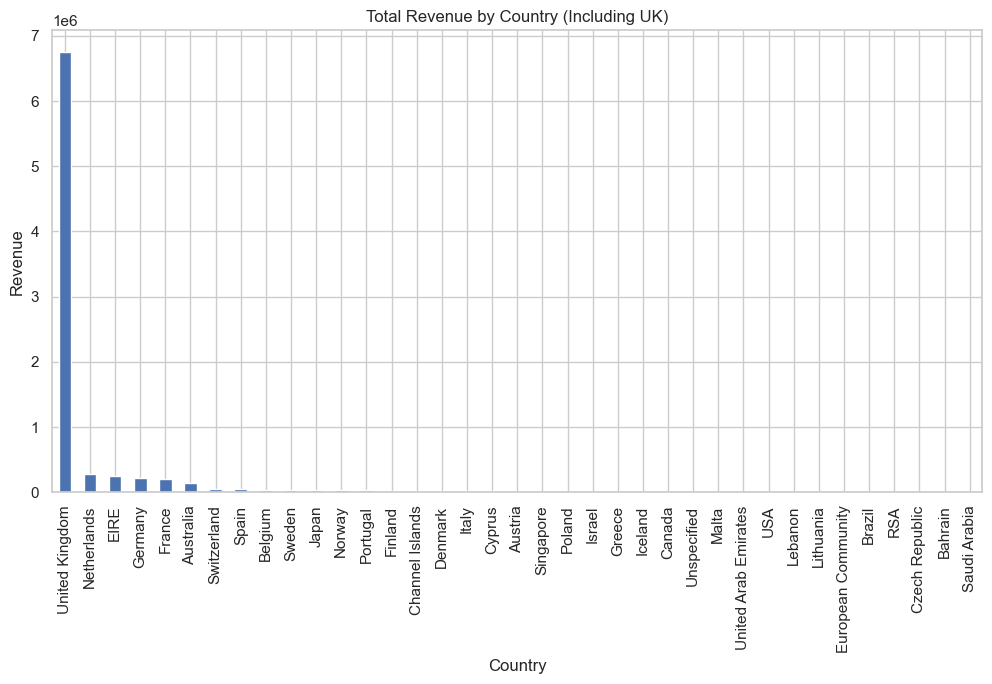

In [29]:
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
country_revenue.plot(kind='bar')
plt.title("Total Revenue by Country (Including UK)")
plt.ylabel("Revenue")
plt.show()

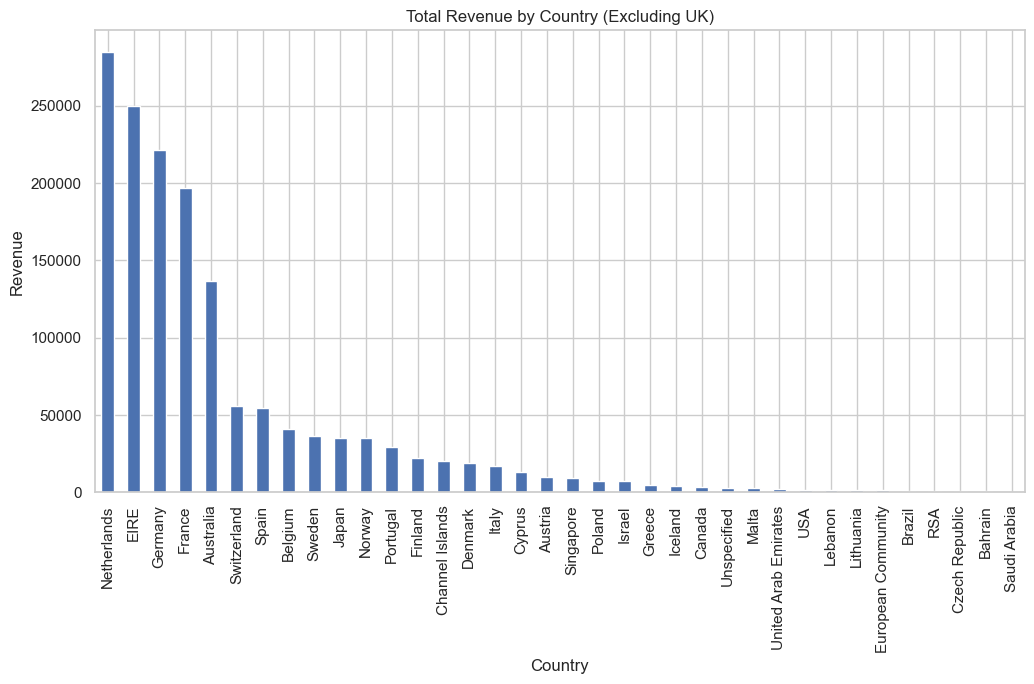

In [30]:
country_revenue_no_uk = country_revenue.drop('United Kingdom')

plt.figure(figsize=(12,6))
country_revenue_no_uk.plot(kind='bar')
plt.title("Total Revenue by Country (Excluding UK)")
plt.ylabel("Revenue")
plt.show()

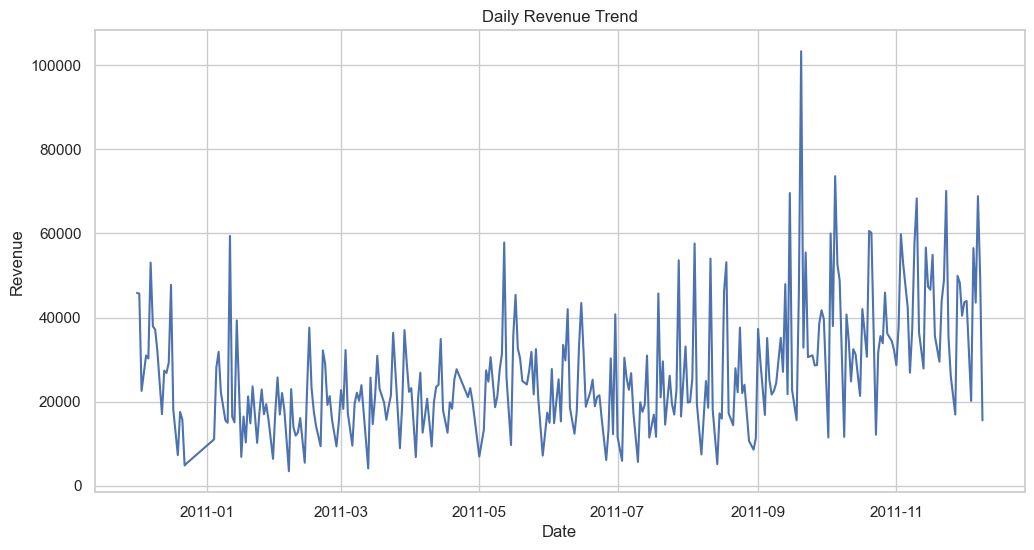

In [31]:
df['Date'] = df['InvoiceDate'].dt.date
daily_revenue = df.groupby('Date')['Amount'].sum()

plt.figure(figsize=(12,6))
daily_revenue.plot()
plt.title("Daily Revenue Trend")
plt.ylabel("Revenue")
plt.show()

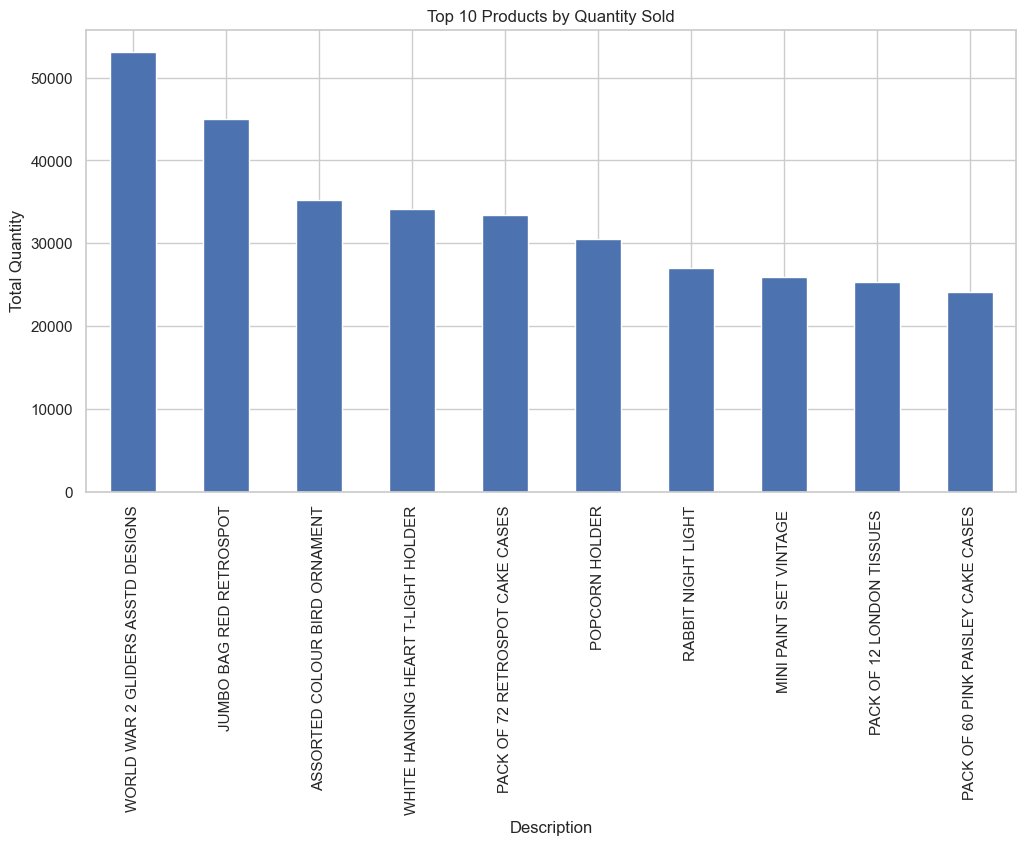

In [32]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Quantity Sold")
plt.ylabel("Total Quantity")
plt.show()

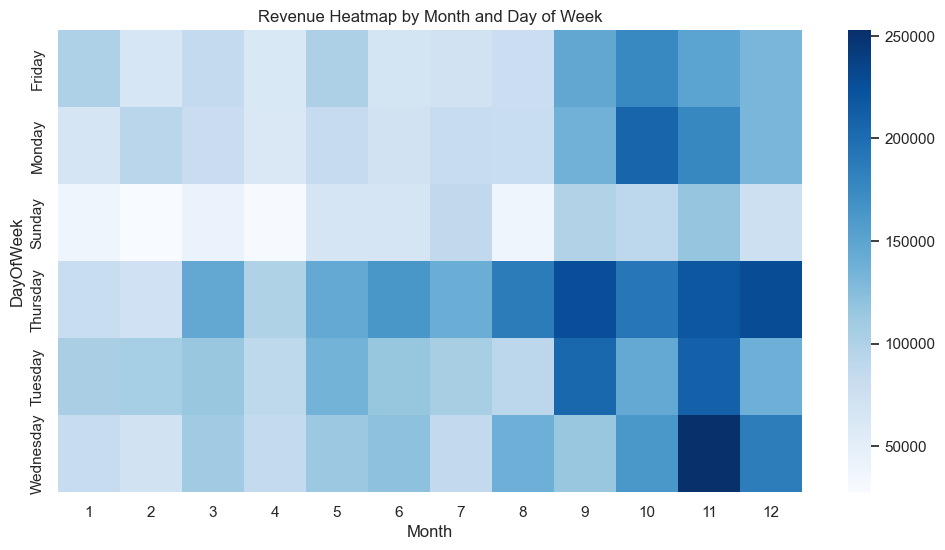

In [33]:
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

pivot = df.pivot_table(values='Amount', index='DayOfWeek', columns='Month', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='Blues')
plt.title("Revenue Heatmap by Month and Day of Week")
plt.show()

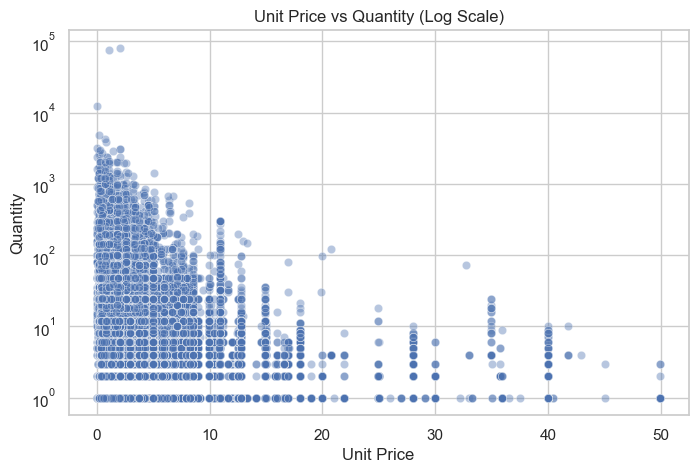

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='UnitPrice',
    y='Quantity',
    data=df[df['UnitPrice'] < 50],
    alpha=0.4
)
plt.yscale('log')
plt.title("Unit Price vs Quantity (Log Scale)")
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.show()






**Thank you for checking my notebook. I hope the analysis is clear and helpful.**